In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
titanic = pd.read_csv('datas/titanic_rev.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_range,count
0,1,0,3,Braund,male,22,1,0,A/5 21171,7.2500,S,adult,1
1,2,1,1,Cumings,female,38,1,0,PC 17599,71.2833,C,adult,1
2,3,1,3,Heikkinen,female,26,0,0,STON/O2. 3101282,7.9250,S,adult,1
3,4,1,1,Futrelle,female,35,1,0,113803,53.1000,S,adult,1
4,5,0,3,Allen,male,35,0,0,373450,8.0500,S,adult,1


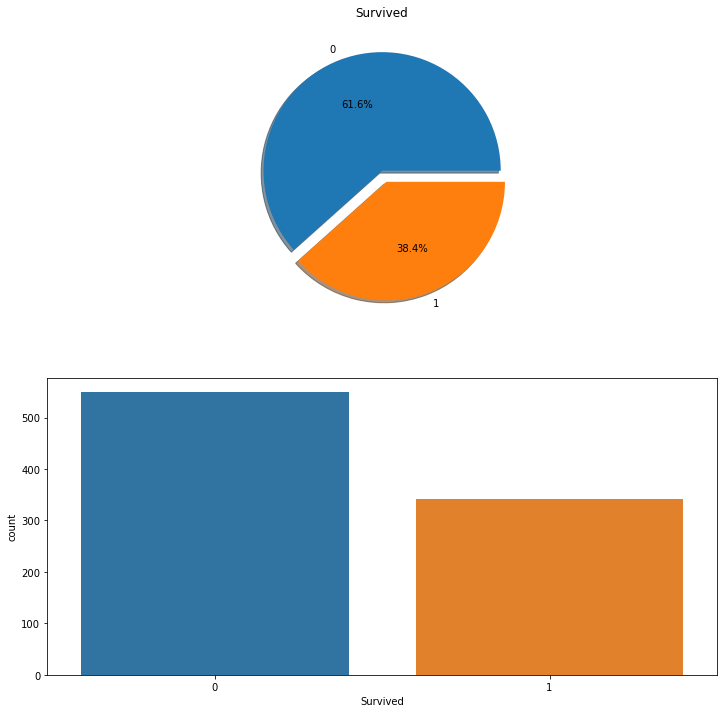

In [132]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2, 1, 1)
ax1 = titanic['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)
ax1.set_title('Survived')
ax1.set_ylabel('')

ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.countplot('Survived', data=titanic)
plt.show()

In [133]:
count_sex = titanic.groupby(['Sex', 'Survived'])['Survived'].count()
count_sex

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

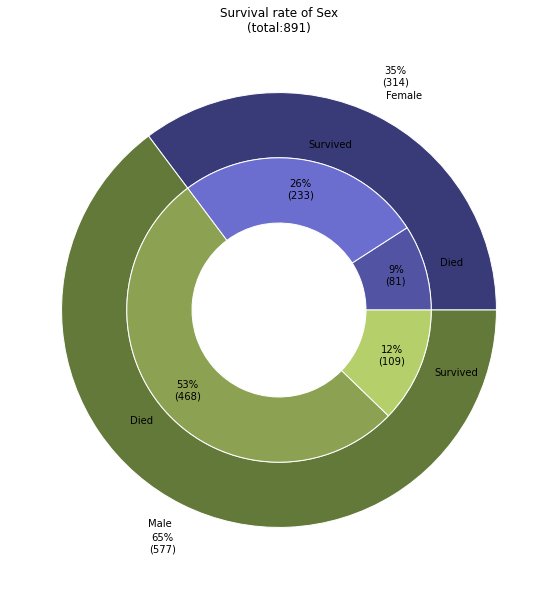

In [134]:
fig, bx1 = plt.subplots(figsize=(10,10))

cmap = plt.get_cmap('tab20b')
outer_colors = cmap(np.arange(2)*4)
inner_colors = cmap([1, 2, 5, 6])

outer_labels=['Female', 'Male']
inner_labels=['Died', 'Survived', 'Died', 'Survived']

nums = np.array([[81, 233], [468, 109]])

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.0f}%\n({:d})".format(pct, absolute)

#outer circle
bx1.pie(nums.sum(axis=1), autopct=lambda pct: func(pct, nums.sum(axis=1)),
        pctdistance=1.2, colors=outer_colors, labels=outer_labels,
        radius=1, wedgeprops=dict(width=0.3, edgecolor='w'))
#inner circle
bx1.pie(nums.flatten(), autopct=lambda pct: func(pct, nums.flatten()),
        pctdistance=0.8, colors=inner_colors, labels=inner_labels,
        radius=1-0.3, wedgeprops=dict(width=0.3, edgecolor='w'))
bx1.set_title("Survival rate of Sex\n(total:891)")
plt.show()

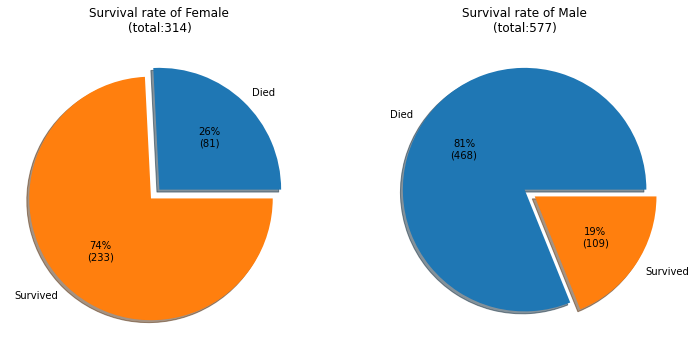

In [135]:
fig = plt.figure(figsize=(12,12))
nums = [81, 233, 468, 109]
labels = ['Died', 'Survived']

bx2 = fig.add_subplot(1, 2, 1)
bx2.pie(nums[:2], explode=[0, 0.1], labels=labels, autopct=lambda pct: func(pct, nums[:2]), shadow=True)
bx2.set_title("Survival rate of Female\n(total:314)")

bx3 = fig.add_subplot(1, 2, 2)
bx3.pie(nums[2:], explode=[0, 0.1], labels=labels, autopct=lambda pct: func(pct, nums[2:]), shadow=True)
bx3.set_title("Survival rate of Male\n(total:577)")
plt.show()

In [136]:
count_pclass = titanic.groupby(['Pclass', 'Survived'])['Survived'].count()
count_pclass

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

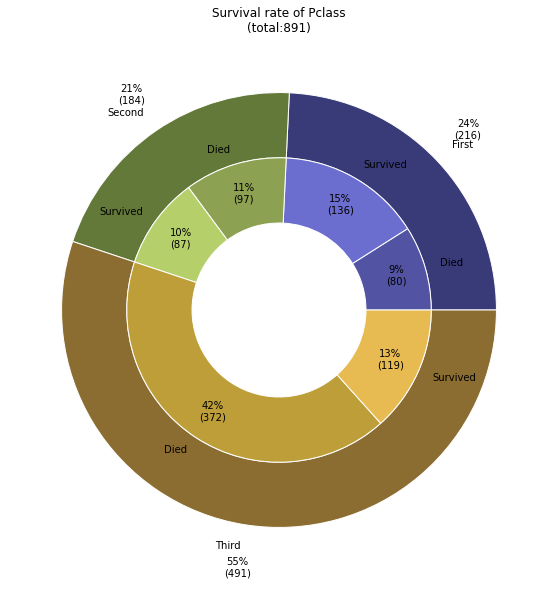

In [137]:
fig, cx1 = plt.subplots(figsize=(10,10))

cmap = plt.get_cmap('tab20b')
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

outer_labels=['First', 'Second', 'Third']
inner_labels=['Died', 'Survived', 'Died', 'Survived', 'Died', 'Survived']

nums = np.array([[80, 136], [97, 87], [372, 119]])

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.0f}%\n({:d})".format(pct, absolute)

#outer circle
cx1.pie(nums.sum(axis=1), autopct=lambda pct: func(pct, nums.sum(axis=1)),
        pctdistance=1.2, colors=outer_colors, labels=outer_labels,
        radius=1, wedgeprops=dict(width=0.3, edgecolor='w'))
#inner circle
cx1.pie(nums.flatten(), autopct=lambda pct: func(pct, nums.flatten()),
        pctdistance=0.8, colors=inner_colors, labels=inner_labels,
        radius=1-0.3, wedgeprops=dict(width=0.3, edgecolor='w'))
cx1.set_title("Survival rate of Pclass\n(total:891)")
plt.show()

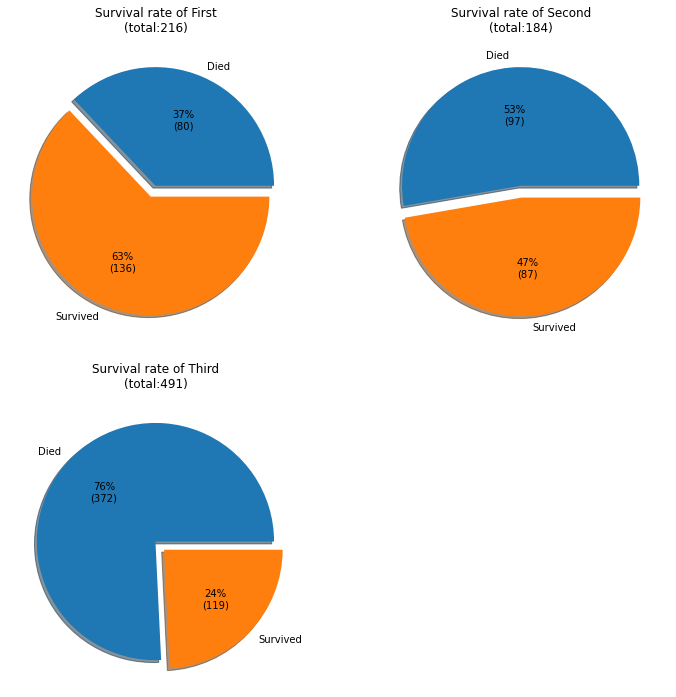

In [138]:
fig = plt.figure(figsize=(12,12))
nums = [80, 136, 97, 87, 372, 119]
inner_labels=['Died', 'Survived']

cx2 = fig.add_subplot(2, 2, 1)
cx2.pie(nums[:2], explode=[0, 0.1], labels=labels, autopct=lambda pct: func(pct, nums[:2]), shadow=True)
cx2.set_title("Survival rate of First\n(total:216)")

cx3 = fig.add_subplot(2, 2, 2)
cx3.pie(nums[2:4], explode=[0, 0.1], labels=labels, autopct=lambda pct: func(pct, nums[2:4]), shadow=True)
cx3.set_title("Survival rate of Second\n(total:184)")

cx3 = fig.add_subplot(2, 2, 3)
cx3.pie(nums[4:], explode=[0, 0.1], labels=labels, autopct=lambda pct: func(pct, nums[4:]), shadow=True)
cx3.set_title("Survival rate of Third\n(total:491)")
plt.show()

In [139]:
count_agerange = titanic.groupby(['age_range', 'Survived'])['Survived'].count()
count_agerange

age_range  Survived
adult      0           452
           1           260
child      0            26
           1            38
teen       0            71
           1            44
Name: Survived, dtype: int64

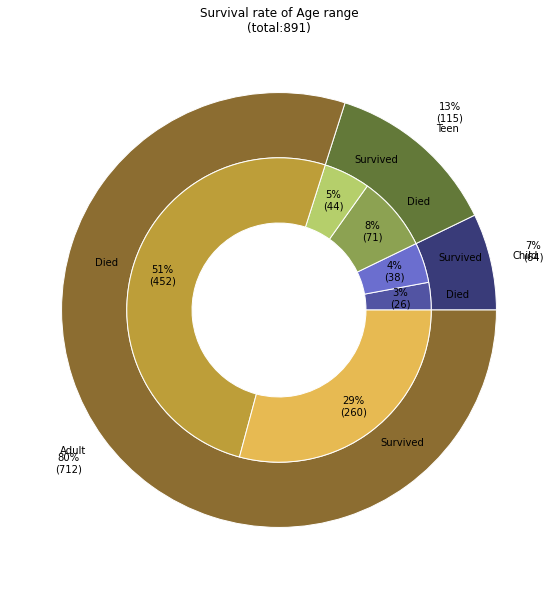

In [140]:
fig, dx1 = plt.subplots(figsize=(10,10))

cmap = plt.get_cmap('tab20b')
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

outer_labels=['Child', 'Teen', 'Adult']
inner_labels=['Died', 'Survived', 'Died', 'Survived', 'Died', 'Survived']

nums = np.array([[26, 38], [71, 44], [452, 260]])

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.0f}%\n({:d})".format(pct, absolute)

#outer circle
dx1.pie(nums.sum(axis=1), autopct=lambda pct: func(pct, nums.sum(axis=1)),
        pctdistance=1.2, colors=outer_colors, labels=outer_labels,
        radius=1, wedgeprops=dict(width=0.3, edgecolor='w'))
#inner circle
dx1.pie(nums.flatten(), autopct=lambda pct: func(pct, nums.flatten()),
        pctdistance=0.8, colors=inner_colors, labels=inner_labels,
        radius=1-0.3, wedgeprops=dict(width=0.3, edgecolor='w'))
dx1.set_title("Survival rate of Age range\n(total:891)")
plt.show()

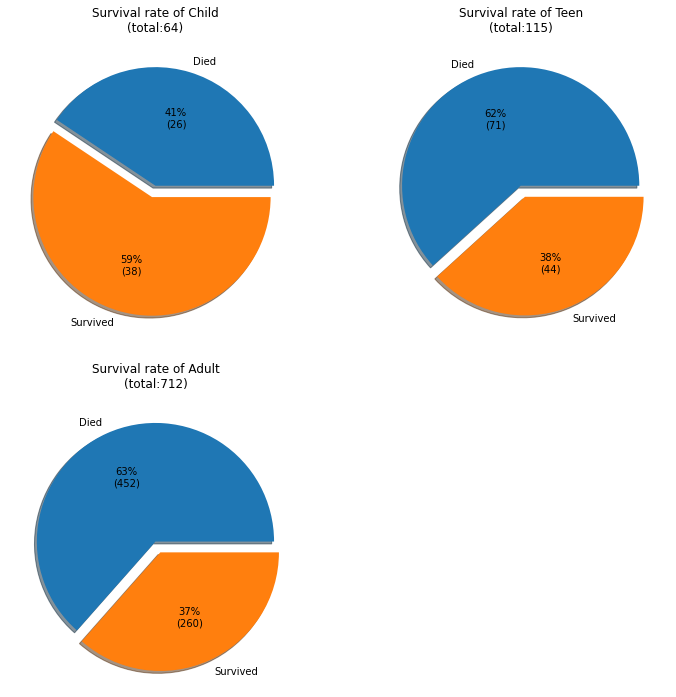

In [141]:
fig = plt.figure(figsize=(12,12))
nums = [26, 38, 71, 44, 452, 260]
inner_labels=['Died', 'Survived']

dx2 = fig.add_subplot(2, 2, 1)
dx2.pie(nums[:2], explode=[0, 0.1], labels=labels, autopct=lambda pct: func(pct, nums[:2]), shadow=True)
dx2.set_title("Survival rate of Child\n(total:64)")

dx3 = fig.add_subplot(2, 2, 2)
dx3.pie(nums[2:4], explode=[0, 0.1], labels=labels, autopct=lambda pct: func(pct, nums[2:4]), shadow=True)
dx3.set_title("Survival rate of Teen\n(total:115)")

dx3 = fig.add_subplot(2, 2, 3)
dx3.pie(nums[4:], explode=[0, 0.1], labels=labels, autopct=lambda pct: func(pct, nums[4:]), shadow=True)
dx3.set_title("Survival rate of Adult\n(total:712)")
plt.show()